<h1>Predicting the Outcome of the 2016 USA Presidential Election</h1>

<h2>Import Libraries</h2>

In [29]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

<h2>Import and Check dataset</h2>

<b>As requested by the question, I will remove the missing data.</b>

In [3]:
df = pd.read_csv("2016-general-election-trump-vs-clinton.csv")
df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,NaN,NaN,1


In [4]:
election = df
election = election[election["Number of Observations"].notna()]
election.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,NaN,NaN,1
5,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07T21:25:46Z,3669.0,Likely Voters,Internet,41.0,45.0,5.0,4.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/11/07/final...,Nonpartisan,NaN,NaN,1
6,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07T21:25:46Z,1392.0,Likely Voters - Democrat,Internet,6.0,90.0,2.0,2.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/11/07/final...,Nonpartisan,NaN,NaN,1
7,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07T21:25:46Z,1110.0,Likely Voters - Republican,Internet,84.0,4.0,4.0,4.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/11/07/final...,Nonpartisan,NaN,NaN,1


<h2>Task 1</h2>

In [7]:
N = election["Number of Observations"].sum()
mean_of_clinton_votes = election["Clinton"].mean()
p_hat = mean_of_clinton_votes/100
std = p_hat * (1 - p_hat) / N
SE = np.sqrt(std)
z_star = stats.norm.ppf(0.975)
margin_of_error = z_star * SE
CI_lower = p_hat - margin_of_error
CI_upper = p_hat + margin_of_error
print(f"Sample Proportion (p̂): {p_hat:.4f}")
print(f"95% Confidence Interval: ({CI_lower:.4f}, {CI_upper:.4f})")

Sample Proportion (p̂): 0.4354
95% Confidence Interval: (0.4347, 0.4361)


<h2>Task 2</h2>

In [8]:
def simulation(N, p, iteration = 100000):
    count = 0
    for _ in range(iteration):
        sample = np.random.binomial(n=1, p=p, size=N)
        p_hat = np.mean(sample)
        SE = np.sqrt((p_hat * (1 - p_hat)) / N)
        z_star = stats.norm.ppf(0.975)
        margin_of_error = z_star * SE
        CI_lower = p_hat - margin_of_error
        CI_upper = p_hat + margin_of_error
        if p >= CI_lower and p <= CI_upper:
            count += 1
    rate = count / iteration
    return rate
p = 0.47
N = 30
print(f"Proportion of CIs capturing p: {simulation(N, p):.4f}")

Proportion of CIs capturing p: 0.9320


<h2>Task 3</h2>

In [9]:
features = ["Trump", "Clinton", "Pollster", "Start Date", "Number of Observations", "Mode"]
data = df[features]
data = data[data["Number of Observations"].notna()]

<h2>Task 4</h2>

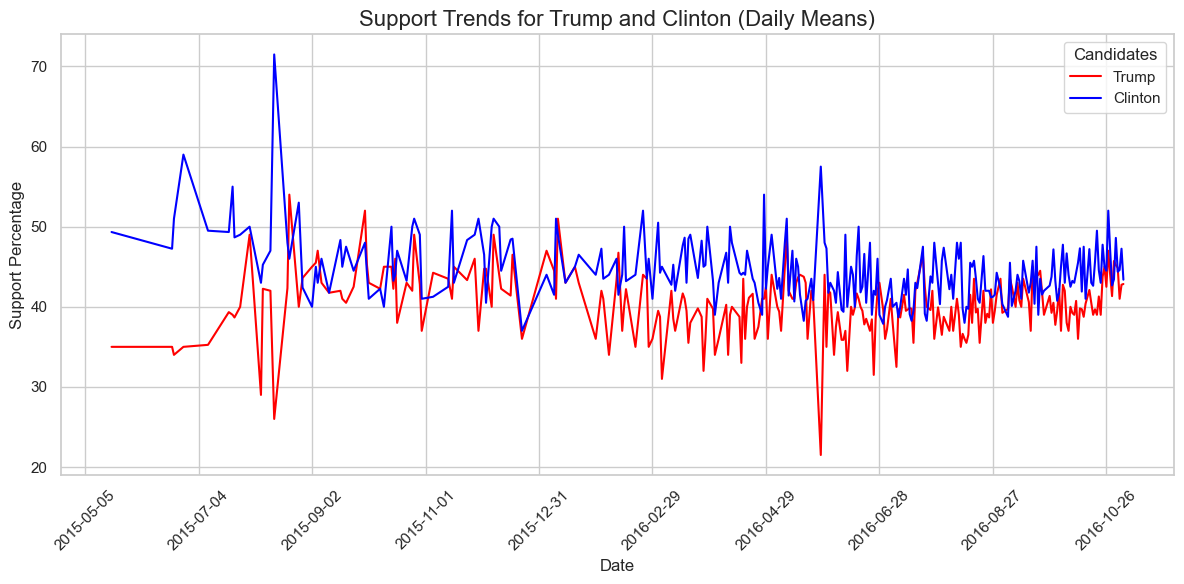

In [18]:
data['Start Date'] = pd.to_datetime(data['Start Date'])
daily_mean = data.groupby('Start Date', as_index=False)[['Trump', 'Clinton']].mean()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='Start Date', y='Trump', data=daily_mean, label='Trump', color='red', errorbar=None)
sns.lineplot(x='Start Date', y='Clinton', data=daily_mean, label='Clinton', color='blue', errorbar=None)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45)
plt.title('Support Trends for Trump and Clinton (Daily Means)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Support Percentage', fontsize=12)
plt.legend(title='Candidates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2>Task 5</h2>

In [10]:
N = election["Number of Observations"].sum()
print(N)

1940931.0


<h2>Task 6 & 7</h2>

In [21]:
z_star = stats.norm.ppf(0.975)


mean_of_clinton_votes = election["Clinton"].mean()
p_hat_C = mean_of_clinton_votes/100
std_C = p_hat_C * (1 - p_hat_C) / N
SE_C = np.sqrt(std_C)
margin_of_error_C = z_star * SE_C
CI_lower_C = p_hat_C - margin_of_error_C
CI_upper_C = p_hat_C + margin_of_error_C


mean_of_trump_votes = election["Trump"].mean()
p_hat_T = mean_of_trump_votes/100
std_T = p_hat_T * (1 - p_hat_T) / N
SE_T = np.sqrt(std_T)
margin_of_error_T = z_star * SE_T
CI_lower_T = p_hat_T - margin_of_error_T
CI_upper_T = p_hat_T + margin_of_error_T


estimates_table = pd.DataFrame({
    'Candidate': ['Trump', 'Clinton'],
    'Mean Support (%)': [p_hat_T, p_hat_C],
    '95% CI Lower': [CI_lower_T, CI_lower_C],
    '95% CI Upper': [CI_upper_C, CI_upper_T]
})
print(estimates_table)

  Candidate  Mean Support (%)  95% CI Lower  95% CI Upper
0     Trump          0.404038      0.228444      0.612789
1   Clinton          0.435370      0.257952      0.579631


<h2>Task 8</h2>

<h3>a)</h3>

In [31]:
mean_of_clinton_votes = election["Clinton"].mean()/100
d_C = (2 * mean_of_clinton_votes) - 1
std_C = mean_of_clinton_votes * (1 - mean_of_clinton_votes) / N
SE_C = np.sqrt(std_C)
margin_of_error_C = 1.96 * 2 * SE_C
CI_lower_C = d_C - margin_of_error_C
CI_upper_C = d_C + margin_of_error_C


print(f"95% Confidence Interval: ({CI_lower_C:.4f}, {CI_upper_C:.4f})")

95% Confidence Interval: (-0.4841, 0.2256)


<h3>b)</h3>

In [32]:
z_score = d_C / SE_C

p_value = 2 * (1 - norm.cdf(abs(z_score)))

print(f"Z-Score for Hypothesis Test: {z_score:.4f}")
print(f"P-Value for Hypothesis Test: {p_value:.4f}")

Z-Score for Hypothesis Test: -1.4279
P-Value for Hypothesis Test: 0.1533
